# New Section

In [ ]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from google.colab import drive
import matplotlib.pyplot as plt
import pickle
from matplotlib import style



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/student-mat.csv"
data = pd.read_csv(path , sep=";")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


   G1  G2  G3  studytime  failures  absences
0   5   6   6          2         0         6
1   5   5   6          2         0         4
2   7   8  10          2         3        10
3  15  14  15          3         0         2
4   6  10  10          2         0         4
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
0.7985633314607298
coefficient: 
 [ 0.13205362  0.98102337 -0.03552366 -0.29777318  0.03416182]
intercept:
 -1.5199169419966836
0.7985633314607298  This value is the model accurac

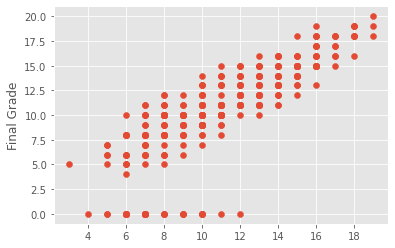

In [ ]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences" ]]
print(data.head())

predict = "G3"

X = np.array(data.drop([predict], 1))
y = np.array(data[predict])
x_train, x_test , y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size = 0.1)

best = 0
for _ in range(30):

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print(acc)

    if acc > best:
      best = acc
      with open ("studentmodel.pickle", "wb") as f:
        pickle.dump(linear, f)


pickle_in = open("studentmodel.pickle", "rb")  
linear = pickle.load(pickle_in)

print('coefficient: \n', linear.coef_)
print('intercept:\n' , linear.intercept_)
print(acc," This value is the model accuracy")

predictions  = linear.predict(x_test)

for x in range(len(predictions)):
  print(predictions[x], x_test[x], y_test[x])

p = 'G1'
style.use("ggplot") 
plt.scatter(data[p],data["G3"])
plt.ylabel("Final Grade")
plt.show()